<a href="https://colab.research.google.com/github/honlai/Financial_Mathematics_I/blob/main/Constrained_Risk_Budgeting_Portfolios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Note
##Constrained Risk Budgeting Portfolios

##Theory, Algorithms, Applications & Puzzles
##SSRN-id3331184

---
# Risk Budgeting Portfolio

## Definitions

### Assets
Let's denote the assets as $$i = 1, 2, ..., N$$

### Points in time
The points in time are represented as $$t = t_1 ,t_2 ..., t_M$$

### Price of $i$ th stock
The price of the $i$ th stock is denoted as $$P_i(t)$$

### Corresponding returns (linear returns)
The corresponding returns can be calculated as $$R_i(t)=\frac{P_i(t)-P_i(t-1)}{P_i(t-1)}=\frac{P_i(t)}{P_i(t-1)}-1$$

### Mean returns
The mean returns are given by $$\mu_i=\frac{1}{M}\sum_{t=1}^MR_i(t)$$

### Expected returns
The expected returns are represented as $$\mu=(\mu_1,\mu_2,...,\mu_N)^T$$

### Correlation matrix (correlation between asset i and asset j)
The correlation matrix is denoted as $$\rho_{i,j}$$

### Volatility of asset i (standard deviation)
The volatility of asset i is given by $$\sigma_i$$

### Covariance matrix of asset returns
The covariance matrix of asset returns is $$\Sigma_{i,j}=\rho_{i,j}\sigma_i\sigma_j$$

### Portfolio volatility
The portfolio volatility is calculated as $$\sigma(\mathcal{w})=\sqrt{\mathcal{w}^T\Sigma\mathcal{w}}$$

### Standard deviation-based risk measure
The standard deviation-based risk measure is given by $$\mathcal{R}(\mathcal{w})=-\mathcal{w}^T(\mu-r)+c\cdot\sigma(\mathcal{w})$$ where c is a scalar that measures the trade-off between the expected return of the portfolio and its volatility.

### Risk budget
The risk budget is defined as $$b_i\gt0,\hspace{5mm}\sum_{i=1}^Nb_i=1$$

### Risk contribution of asset $i$
The risk contribution of asset $i$ is $$\mathcal{R}\mathcal{C}_i(\mathcal{w})=\mathcal{w}_i\cdot(-(\mu_i-r)+c\cdot\frac{(\Sigma\mathcal{w})_i}{\sigma(\mathcal{w})})=b_i\mathcal{R}(\mathcal{w})$$

## Remarks

1. According to Roncalli (2015), the Risk Budgeting Portfolio (RBP) exists and is unique if $$c \gt SR^+$$ where $$SR^+=max\lbrace sup\hspace{2mm}SR(\mathcal{w}|r),\hspace{2mm}0 \rbrace$$ for $$\mathcal{w}\in\lbrack0,1\rbrack^n$$

2. The original Equal Risk Contribution(ERC) portfolio is obtained by considering the volatility risk measure and the same risk budgets. \\
That is, $\mu_i=r$ , $c=1$ , $b_i=\frac{1}{N}$. \\
Then we have $$\mathcal{RC}_i(\mathcal{w})=\frac{1}{N}\sigma(\mathcal{w})$$


In [73]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

In [74]:
#股票代號
stocks_list=np.array(['2330.TW','2357.TW','2454.TW','3231.TW'])
#開始日期
start_date='2020-01-01'
#完結日期
end_date='2023-10-01'
#股票數
N=len(stocks_list)
#次數
M=0#len(data)

In [75]:
# 創建一個空的的主數據框data
data = pd.DataFrame()
for stock in stocks_list:
    # yf.download(股票代號,start=開始日期,end=完結日期)
    # yf.download(股票代號,period=日期範圍(1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max),
    #         interval=頻率(1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo))
    df=yf.download(stock,start=start_date,end=end_date)
    df=df[['Adj Close']]#調整後收盤價
    df=df.rename(columns = {'Adj Close': stock})
    if data.empty:
        data = df
    else:
        data=pd.concat([data, df], axis=1)
    print(stock)

[*********************100%%**********************]  1 of 1 completed
2330.TW
[*********************100%%**********************]  1 of 1 completed
2357.TW
[*********************100%%**********************]  1 of 1 completed
2454.TW
[*********************100%%**********************]  1 of 1 completed
3231.TW


910
               2330.TW     2357.TW     2454.TW     3231.TW
Date                                                      
2020-01-02  310.429138  167.492874  342.400635   22.340097
2020-01-03  310.887024  168.936768  336.971863   22.261433
2020-01-06  304.019165  167.853836  328.828674   22.025446
2020-01-07  301.729797  169.658722  330.379761   22.418758
2020-01-08  301.729797  167.492874  333.869690   22.104109
...                ...         ...         ...         ...
2023-09-22  519.285950  357.500000  746.000000  102.500000
2023-09-25  522.270386  359.500000  755.000000  103.000000
2023-09-26  516.301575  358.000000  737.000000  101.500000
2023-09-27  519.285950  364.000000  737.000000  103.000000
2023-09-28  520.280762  367.000000  735.000000  101.500000

[910 rows x 4 columns]


<Axes: xlabel='Date'>

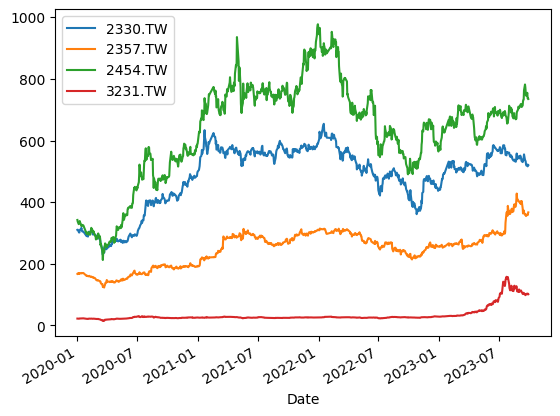

In [76]:
M=len(data)
print(M)
print(data)
data.plot()

In [77]:
"""
Calculate the Corresponding returns
"""
# Initialize an empty DataFrame for Corresponding returns
crpd_rtn = pd.DataFrame()

# Loop over each stock in the list
for stock in stocks_list:
    # Create a temporary DataFrame for the current stock
    tmp = pd.DataFrame({stock: data[stock]})

    # Calculate the Corresponding returns for each day
    for i in range(1, len(data[stock])):
        tmp[stock][i] /= data[stock][i - 1]

    # Set the first day's Corresponding returns to 1
    tmp[stock][0] = 1

    # Concatenate the temporary DataFrame to the Corresponding returns return DataFrame
    crpd_rtn = pd.concat([crpd_rtn, tmp], axis=1)

crpd_rtn

,2330.TW,2357.TW,2454.TW,3231.TW
Date,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.001475,1.008621,0.984145,0.996479
2020-01-06,0.977909,0.993590,0.975834,0.989399
2020-01-07,0.992470,1.010753,1.004717,1.017857
2020-01-08,1.000000,0.987234,1.010563,0.985965
...,...,...,...,...
2023-09-22,0.990512,1.007042,1.000000,1.019900
2023-09-25,1.005747,1.005594,1.012064,1.004878
2023-09-26,0.988571,0.995828,0.976159,0.985437


             2330.TW   2357.TW   2454.TW   3231.TW
Date                                              
2020-01-02  1.000000  1.000000  1.000000  1.000000
2020-01-03  1.001475  1.008621  0.984145  0.996479
2020-01-06  0.979351  1.002155  0.960362  0.985915
2020-01-07  0.971976  1.012931  0.964892  1.003521
2020-01-08  0.971976  1.000000  0.975085  0.989437
...              ...       ...       ...       ...
2023-09-22  1.672800  2.134419  2.178734  4.588163
2023-09-25  1.682414  2.146360  2.205019  4.610544
2023-09-26  1.663187  2.137404  2.152449  4.543400
2023-09-27  1.672800  2.173227  2.152449  4.610544
2023-09-28  1.676005  2.191138  2.146608  4.543400

[910 rows x 4 columns]


<Axes: xlabel='Date'>

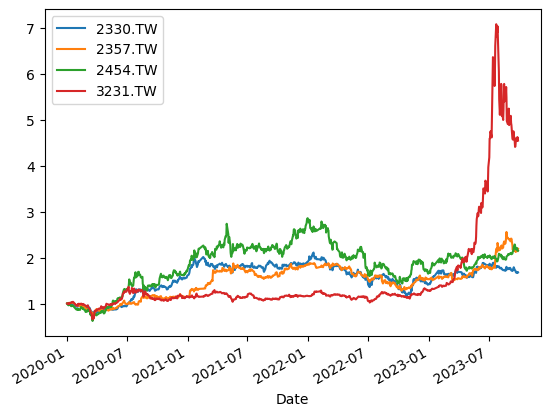

In [78]:
crpd_rtn_cumprod=crpd_rtn.cumprod(axis = 0)
print(crpd_rtn_cumprod)
crpd_rtn_cumprod.plot()

In [79]:
def get_e_rtn(arg_crpd_rtn):
  """
  Calculate the expected return
  """
  f_expected_rtn=arg_crpd_rtn.mean()
  return f_expected_rtn
expected_rtn=get_e_rtn(crpd_rtn)

In [80]:
def get_crl_matrix(arg_crpd_rtn):
  """
  Calculate the correlation matrix
  """
  f_correlation_matrix = np.corrcoef(arg_crpd_rtn,None,False)
  return f_correlation_matrix
def get_std(arg_crpd_rtn):
  """
  Calculate the standard deviation
  """
  f_std_dev = np.std(arg_crpd_rtn)
  return f_std_dev
def get_cov(arg_crpd_rtn):
  """
  Calculate the covariance matrix
  """
  f_correlation_matrix=get_crl_matrix(arg_crpd_rtn)
  f_std_dev=get_std(arg_crpd_rtn)
  f_covariance_matrix = np.zeros([N,N])
  for i in range(N):
    for j in range(N):
      f_covariance_matrix[i][j]=f_correlation_matrix[i][j]*f_std_dev[i]*f_std_dev[j]
  return f_covariance_matrix

In [81]:
correlation_matrix=get_crl_matrix(crpd_rtn)
print(correlation_matrix)
std_dev=get_std(crpd_rtn)
print(std_dev)
covariance_matrix=get_cov(crpd_rtn)
print(covariance_matrix)

[[1.         0.31567633 0.54784194 0.28542199]
 [0.31567633 1.         0.24134572 0.33636707]
 [0.54784194 0.24134572 1.         0.18037036]
 [0.28542199 0.33636707 0.18037036 1.        ]]
2330.TW    0.017668
2357.TW    0.017332
2454.TW    0.024861
3231.TW    0.022527
dtype: float64
[[3.12148485e-04 9.66640464e-05 2.40632086e-04 1.13595995e-04]
 [9.66640464e-05 3.00389443e-04 1.03991917e-04 1.31326019e-04]
 [2.40632086e-04 1.03991917e-04 6.18066624e-04 1.01013120e-04]
 [1.13595995e-04 1.31326019e-04 1.01013120e-04 5.07446130e-04]]


In [82]:
#parameters
#ERC
r=expected_rtn
c=1
risk_budget=np.ones(N)
risk_budget/=N

def get_pvol(arg_w):
  """
  Calculate the portfolio volatility: sqrt(w.T * cov * w)
  """
  sigma=(arg_w.T.dot(covariance_matrix.dot(arg_w)))**0.5
  return sigma
def std_dev_b_risk_measure(arg_w):

  """
  Calculate the standard deviation-based risk measure: R(w)
  """
  R=-arg_w.T.dot(expected_rtn-r)+c*get_pvol(arg_w)
  return R
def risk_contribution(arg_w):
  """
  Calculate the risk contribution: RCi(w)
  """
  RC=np.zeros(N)
  for i in range(N):
    RCi=arg_w[i]*(-(expected_rtn-r)+c*(covariance_matrix.dot(arg_w)[i])/get_pvol(arg_w))
    RC[i]+=RCi[0]
  return RC

In [83]:
w_test=np.ones(N)
w_test[0]*=0.25
w_test[1]*=0.25
w_test[2]*=0.25
w_test[3]*=0.25

#print(std_dev_b_risk_measure(w_test))
#print(risk_contribution(w_test))


# Risk Budgeting Portfolio Optimization

## Roncalli's Formulation (2013)

The risk budgeting portfolio is obtained by minimizing the risk subject to a constraint on the risk budget. This can be formulated as:

$$\mathcal{w}_{RB}=arg\hspace{2mm}min\hspace{2mm}\mathcal{R}(\mathcal{w})$$

subject to

$$\sum_{i=1}^Nb_iln(\mathcal{w}_i)\geq\kappa^*$$

where $\kappa^*$ is a constant.

Using the Lagrange formulation, we get:

$$\mathcal{w}^*(\lambda)=arg\hspace{2mm}min\hspace{2mm}\mathcal{R}(\mathcal{w})-\lambda\sum_{i=1}^Nb_iln(\mathcal{w}_i)\tag1$$

where $\lambda$ is an arbitrary constant. The risk budgeting portfolio is then given by:

$$\mathcal{w}_{RB}=\frac{\mathcal{w}^*(\lambda)}{1^T\mathcal{w}^*(\lambda)}$$



## Newton Algorithm for Optimization (May be improved)

### Solving Equation (1) by the Newton Algorithm

According to Spinu (2013), equation (1) can be solved using the Newton algorithm. The iterative formula is given by:

$$\mathcal{w}^{(k+1)}=\mathcal{w}^{(k)}-\eta^{(k)}(\frac{\partial^2f(\mathcal{w}^{(k)})}{\partial\mathcal{w}\hspace{2mm}\partial\mathcal{w}^T})^{-1} \hspace{2mm}\frac{\partial f(\mathcal{w}^{(k)})}{\partial\mathcal{w}}$$

where $\eta^{(k)}\in\lbrack0,1\rbrack$ is the step size and $k$ is the iteration index. Generally, we set $\eta^{(k)}=1$.

### Computation of First and Second Derivatives

The first and second derivatives are computed using the following analytical expressions:

- The first derivative with respect to $\mathcal{w}_i$ is given by:

$$\frac{\partial f(\mathcal{w})}{\partial\mathcal{w}_i}=\frac{\mathcal{R}\mathcal{C}_i(\mathcal{w})}{\mathcal{w}_i}-\lambda\frac{b_i}{\mathcal{w}_i}$$

- The second derivative with respect to $\mathcal{w}_i$ and $\mathcal{w}_j$ is given by:

$$\frac{\partial^2 f(\mathcal{w})}{\partial\mathcal{w}_i\partial\mathcal{w}_j}=\frac{c}{\sigma(\mathcal{w})}(\Sigma_{i,j}-\frac{(\Sigma\mathcal{w})_i(\Sigma\mathcal{w})_j}{\sigma^2(\mathcal{w})})$$

- The second derivative with respect to $\mathcal{w}_i$ is given by:

$$\frac{\partial^2 f(\mathcal{w})}{\partial\mathcal{w}_i^2}=\frac{c}{\sigma(\mathcal{w})}(\sigma_i^2-\frac{(\Sigma\mathcal{w})_i^2}{\sigma^2(\mathcal{w})})+\lambda\frac{b_i}{\mathcal{w}_i^2}$$


In [84]:
ld=1
def get_df(arg_w):
  """
  Calculate the derivative of the objective function.
  """
  df = np.zeros(N)
  RC = risk_contribution(arg_w)
  for i in range(N):
    df[i] = RC[i] / arg_w[i] - ld * (risk_budget[i] / arg_w[i])
  return df

def get_ddf(arg_w):
  """
  Calculate the Hessian matrix of the objective function.
  """
  ddf = np.zeros([N, N])
  portfolio_volatility = get_pvol(arg_w)
  for i in range(N):
    for j in range(N):
      if j == i:
        ddf[i][j] = (c / portfolio_volatility) * \
                (std_dev[i]**2 - ((covariance_matrix.dot(arg_w)[i])**2 / (portfolio_volatility**2))) + \
                ld * risk_budget[i] / arg_w[i]**2
      else:
        ddf[i][j] = (c / portfolio_volatility) * \
              (covariance_matrix[i][j] - ((covariance_matrix.dot(arg_w)[i]) * (covariance_matrix.dot(arg_w)[j])) / (portfolio_volatility**2))
  return ddf

def newton(arg_w0,tor, Nmax):
  """
  Apply Newton's method to find the optimal portfolio weights.
  """
  weights=[arg_w0]
  error = 1
  for i in range(Nmax):
    if error < tor:
      break
    temp_weights = weights[i] - np.linalg.inv(get_ddf(w[i])).dot(get_df(w[i]))
    weights.append(temp_weights)
    error = abs(sum(weights[i] - weights[i-1]))
  return pd.DataFrame({'weight': weights[-1] / np.sum(weights[-1])}, stocks_list)

w_newton=(netwon(w_test,10**-11,100))
w_newton


,weight
2330.TW,0.264531
2357.TW,0.296471
2454.TW,0.202835
3231.TW,0.236163


## The CCD Algorithm

### The Descent Algorithm

The descent algorithm can be represented as follows:

$$\mathcal{w}^{(k+1)}=\mathcal{w}^{(k)}+\Delta\mathcal{w}^{(k)}=\mathcal{w}^{(k)}-\eta D^{(k)}$$

### The Coordinate Descent Algorithm

The coordinate descent algorithm can be represented as follows:

$$\mathcal{w}_i^{(k+1)}=\mathcal{w}_i^{(k)}+\Delta\mathcal{w}_i^{(k)}=\mathcal{w}_i^{(k)}-\eta D_i^{(k)}$$

There are two approaches concerning the choice of the variable $i$:

- Random Coordinate Descent or RCD (Nesterov, 2012)
- Cyclical Coordinate Descent or CCD (Tseng, 2001)

### The CCD Algorithm

The CCD algorithm can be represented as follows:

$$\mathcal{w}_i^{(k+1)}=arg\hspace{2mm} min f(\mathcal{w}_1^{(k+1)} ,...,\mathcal{w}_{i-1}^{(k+1)},\mathcal{w},\mathcal{w}_{i+1}^{(k+1)},...,\mathcal{w}_N^{(k+1)})$$

According to Griveau-Billion et al. (2013), equation (1) can be solved by the CCD algorithm as follows:

$$\mathcal{w}_i=\frac{-c(\sigma_i\sum_{j\neq i}
\mathcal{w}_j\rho_{i,j}\sigma_j)+(\mu_i-r)\sigma(\mathcal{w})+\sqrt{(c(\sigma_i\sum_{j\neq i}
\mathcal{w}_j\rho_{i,j}\sigma_j)-(\mu_i-r)\sigma(\mathcal{w}))^2+4\lambda cb_i\sigma_i^2\sigma(\mathcal{w})}}{2c\sigma_i^2}$$

This can be simplified by setting $\lambda=1$.


In [85]:
def ccd(arg_w0,tor,Nmax):
  """
  Apply CCD to find the optimal portfolio weights.
  """
  weights = [arg_w0]
  error = 1
  while error >= tor:
    temp_weights = np.zeros(N)
    for i in range(N):
      sigma = get_pvol(weights[-1])
      wps=0
      wps = sum(w_j * correlation_matrix[i][j] * std_dev[j] for j, w_j in enumerate(weights[-1]) if j != i)
      first_term = -c*(std_dev[i]*wps)
      denominator = 2 * c * std_dev[i]**2
      second_term = (expected_rtn - r)[i] * sigma
      third_term = ((-first_term - (expected_rtn - r)[i] * sigma)**2 + 2 * ld  * risk_budget[i] * denominator * sigma)**0.5
      temp_weights[i]=first_term/denominator+ second_term/denominator+ third_term/denominator
    weights.append(temp_weights)
    error = abs(sum(weights[-1] - weights[-2]))
    if len(weights) > Nmax:
        break
  return pd.DataFrame({'weight':weights[-1]/np.sum(weights[-1])},stocks_list)

w_ccd=ccd(w_test,10**-11,100)
w_ccd

,weight
2330.TW,0.264531
2357.TW,0.296471
2454.TW,0.202835
3231.TW,0.236163


#Code in paper

In [86]:
%pip install git+https://github.com/jcrichard/pyrb

  Cloning https://github.com/jcrichard/pyrb to /tmp/pip-req-build-n7cxsdx9
  Running command git clone --filter=blob:none --quiet https://github.com/jcrichard/pyrb /tmp/pip-req-build-n7cxsdx9
  Resolved https://github.com/jcrichard/pyrb to commit 250054efe02ce48cd1ae1ef72f8d808951af5a53
  Preparing metadata (setup.py) ... done


In [87]:
from pyrb import EqualRiskContribution as erc

ERC = erc(covariance_matrix)
ERC.solve()
w_pyrb_ERC = ERC.x
print(w_pyrb_ERC)
print(w_newton)
print(w_ccd)

[0.26453106 0.29647097 0.2028347  0.23616328]
           weight
2330.TW  0.264531
2357.TW  0.296471
2454.TW  0.202835
3231.TW  0.236163
           weight
2330.TW  0.264531
2357.TW  0.296471
2454.TW  0.202835
3231.TW  0.236163


---